# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression


In [47]:
df_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

#retirando coluna unnamed:0
df_renda = df_renda.drop(columns=['Unnamed: 0'])

df_renda.head()


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [48]:
df_renda.corr()

# As variáveis com maior correlação são a 'qt_pessoas_residencia' e 'qtd_filhos', o que realmente faz bastante sentido, pois quanto maior o número de filhos,
# maior deve ser o número de pessoas morando na mesma residência. Outro ponto interessante também é a correlação mais alta entre a renda e o tempo_emprego,
# o que significa que, quanto mais tempo empregado, maior a renda do indivíduo.

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Figure size 1008x432 with 0 Axes>

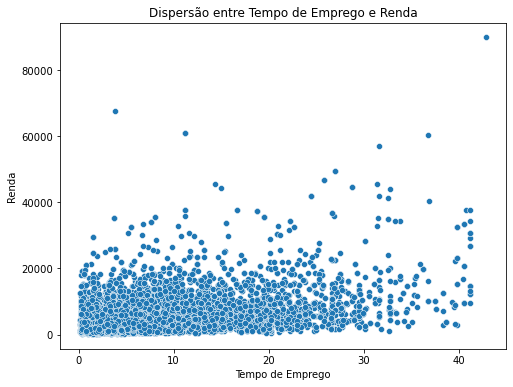

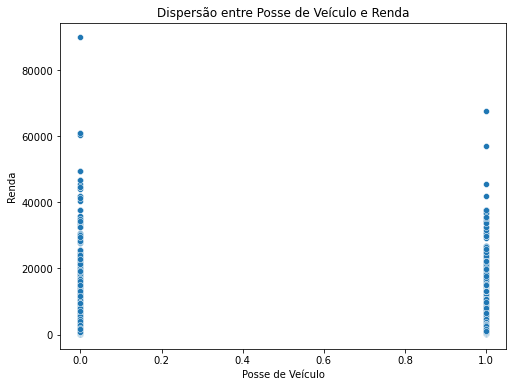

In [49]:
# As 2 variáveis com maior correlação com renda são 'tempo_emprego' e 'posse_de_veiculo'.
plt.figure(figsize=(14, 6))

# Gráfico de dispersão para 'tempo_emprego' e 'renda'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=df_renda)
plt.title('Dispersão entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')

# Gráfico de dispersão para 'posse_de_veiculo' e 'renda'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='posse_de_veiculo', y='renda', data=df_renda)
plt.title('Dispersão entre Posse de Veículo e Renda')
plt.xlabel('Posse de Veículo')
plt.ylabel('Renda')
plt.show()

# O gráfico de dispersão para a primeira variável até que funciona bem, e nele conseguimos perceber inclusive alguns outliers.
# Porém, para a variável 'posse_de_veiculo', o gráfico não fica muito bom, pois ela é uma variável binária, tomando somente valores {0,1}.

3) Na sua opinião, há outliers na variável renda?

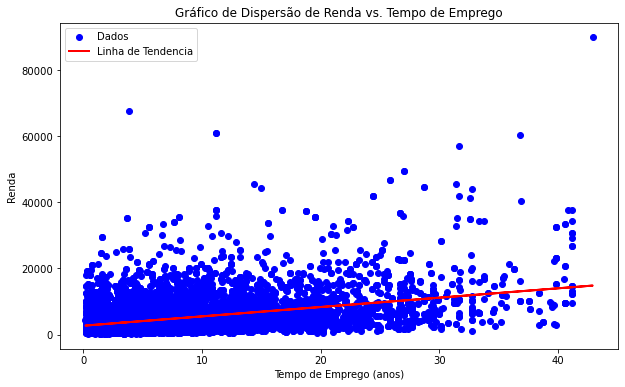

In [54]:
# Sim, é possível perceber que alguns indivíduos possuem renda bem acima da média, fugindo do padrão dos demais clientes,
# e, portanto, podendo ser considerados outliers

# Retirando os NAs, pois estava dando erro
df_renda = df_renda[['renda', 'tempo_emprego']].dropna()

# Regressão linear para plotar a linha de tendência
X = df_renda['tempo_emprego'].values.reshape(-1, 1)
y = df_renda['renda'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotando o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(df_renda['tempo_emprego'], df_renda['renda'], color='blue', label = 'Dados')
plt.plot(df_renda['tempo_emprego'], y_pred, color='red', linewidth=2, label = ('Linha de Tendencia'))
plt.title('Gráfico de Dispersão de Renda vs. Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')
plt.legend()
plt.show()

4) Calcule o logaritmo da variável renda e repita a sequência de análise

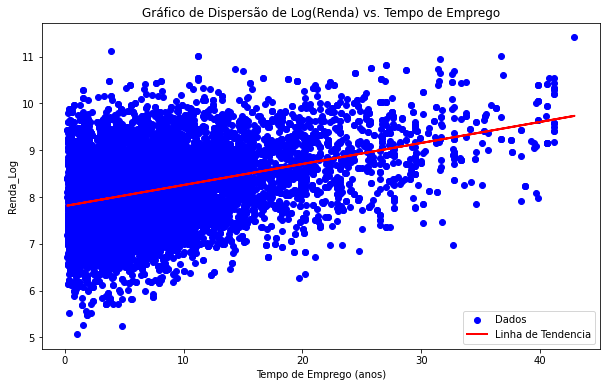

In [56]:
df_renda = df_renda[['renda', 'tempo_emprego']].dropna()

# Calculando o logaritmo da variável renda
df_renda['renda_log'] = np.log(df_renda['renda'])

# Regressão linear para plotar a linha de tendência
X = df_renda['tempo_emprego'].values.reshape(-1, 1)
y = df_renda['renda_log'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotando o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(df_renda['tempo_emprego'], df_renda['renda_log'], color='blue', label='Dados')
plt.plot(df_renda['tempo_emprego'], y_pred, color='red', linewidth=2, label='Linha de Tendencia')
plt.title('Gráfico de Dispersão de Log(Renda) vs. Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda_Log')
plt.legend()
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [57]:
# Acredito que tenha melhorado. Com essa visualização, a linha de tendência ficou mais centralizada,
# sendo mais fácil de ver quais dados estavam acima ou abaixo da previsão.